In [97]:
# -*- coding:utf-8 -*-
# @Author: Niccolò Bonacchi
# @Date: Thursday, February 21st 2019, 7:13:37 pm
# @Last Modified by: Niccolò Bonacchi
# @Last Modified time: 21-02-2019 07:35:12.1212

from pathlib import Path
import ibllib.io.raw_data_loaders as raw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys


def get_port_events(events: dict, name: str = '') -> list:
    out: list = []
    for k in events:
        if name in k:
            out.extend(events[k])
    out = sorted(out)

    return out

def bolded(text, it = False):
    """
    Takes text string and returns it, either bolded or indented with a \t 
    When 'it = True', text is indented rather than bolded
    Used only for easier looking at data print outs
    """
    if it == False:
#         return '\033[1m' + text + '\033[0m'
        return '**' + text + '**'
    else:
        return '\t' + text

def compareLens(l1, l1dataName, l2, l2dataName):
    """ 
    Compares the lengths of lists and returns whether 
    they match or fail to match. 
    It computes & returns the percent by which the larger list of the two is greater. 
    """
    l1dataName = bolded(l1dataName)
    l2dataName = bolded(l2dataName)
    
    def diff():
        """
        Used as hof only within the compareLens environment.
        Returns the percent difference to four decimal places, using the minimum of the two lengths as the base. 
        """
        len1, len2 = len(l1), len(l2)
        return round((max(len1, len2) - min(len1, len2))/min(len1, len2) * 100, 4)
    
    if len(l1) == len(l2):
        print("{} matches the len count of {}".format(l1dataName, l2dataName))
    else:
        print("The two lists, {} and {}, do not match in lengths:".format(l1dataName, l2dataName))
        if len(l1) > len(l2):
            print("\t {} is longer than {} by {}%".format(l1dataName, l2dataName, diff()))
        else:
            print("\t {} is longer than {} by {}%".format(l2dataName, l1dataName, diff()))
    print('\n')  
        
        
        
# session_path = r'C:\iblrig_data\Subjects\_iblrig_test_mouse\2022-09-08\001//'
session_path = '/Users/joshuadamato/My Drive/Adesnik Lab/SampleData/2022-09-06/002'

#local test mouse path: r'C:\iblrig_data\Subjects\_iblrig_test_mouse\2022-09-31\004//'
#synapse path: r'Z:\moraogando\IBLdata\Box1_basement\MBOT42_1840\2022-08-23\002//'
#local path:  r'C:\iblrig_data\Subjects\MBOT42_1840\2022-08-19\005//'


In [95]:
# getting the path to the session; this turns the string of the session
# into a Path object 
session_data_file = Path(session_path)

# makes sure the dir (folder) exits 
if not session_data_file.exists():
    raise (FileNotFoundError)
    
# trial-wise list of dictionaries 
data = raw.load_data(session_data_file)

# initializing a var to track unsynced trials, and lists of port events 
unsynced_trial_count = 0
frame2ttl = []
sound = []
camera = []
cam_frame_df = raw.load_camera_frameData(session_path)
trial_start = []
trial_end = []

# iterates through data by trial, returning ########
for trial_data in data:
    tevents = trial_data['behavior_data']['Events timestamps']
    ev_bnc1 = get_port_events(tevents, name='BNC1')
    ev_bnc2 = get_port_events(tevents, name='BNC2')
    ev_port1 = get_port_events(tevents, name='Port1')
    if not ev_bnc1 or not ev_bnc2 or not ev_port1:
        unsynced_trial_count += 1
    frame2ttl.extend(ev_bnc1)
    sound.extend(ev_bnc2)
    camera.extend(ev_port1)
    trial_start.append(trial_data['behavior_data']['Trial start timestamp'])
    trial_end.append(trial_data['behavior_data']['Trial end timestamp'])
    
#     print(ev_bnc1)
# print(len(data))

Found 11 trials with bad sync data for Box 1


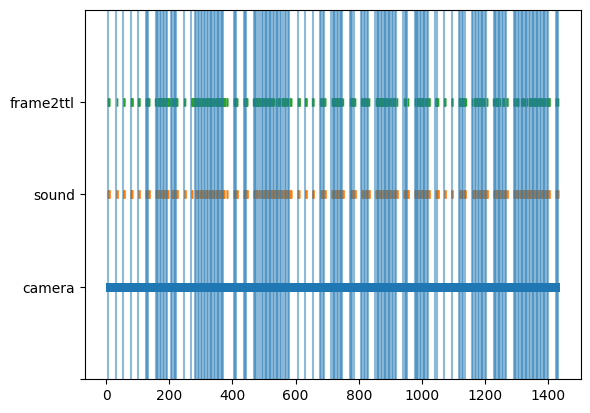

In [31]:
print(f'Found {unsynced_trial_count} trials with bad sync data for Box 1')

f = plt.figure()  #figsize=(19.2, 10.8), dpi=100)
ax = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)

ax.plot(camera, np.ones(len(camera)) * 1, '|')
ax.plot(sound, np.ones(len(sound)) * 2, '|')
ax.plot(frame2ttl, np.ones(len(frame2ttl)) * 3, '|')
[ax.axvline(t, alpha=0.5) for t in trial_end]
ax.set_ylim([0, 4])
ax.set_yticks(range(4))
ax.set_yticklabels(['', 'camera', 'sound', 'frame2ttl'])
plt.show()

### Each code block in the cell below is to explore the sync pulse lists for either the f2ttl, sound, or camera.  

In [32]:
## f2ttl data 
# ev_bnc1 = get_port_events(tevents, name='BNC1')
# # returns final value bound during iteration above 
# ev_bnc1
## returns the full list of ev_bnc1 events
# frame2ttl
# len(frame2ttl)

## sound ttl data 
# ev_bnc2 = get_port_events(tevents, name='BNC2')
# ev_bnc2
# sound 
# len(sound)

## camera ttl data
# ev_port1 = get_port_events(tevents, name='Port1')
# ev_port1
# camera
# len(camera)

### Below tests ttl lists to check for matching lengths 

In [33]:
## gets embedded frame count as list; the last element is the total frame count 
frames = cam_frame_df.embeddedFrameCounter.tolist()
cameraFramesTotal = frames[-1]
print('Cam frames count = ' + str(cameraFramesTotal) + '\nTotal camera port events length is: ' + str(len(camera)))

## each frame produces two ttl's, so the % diff should be 100% 
compareLens(frames, "frames count from camera", camera, "camera port event count (ttl's)")

## these are just to compare each TTL list to one another if wanted 
# compareLens(frame2ttl, 'F2TTL', sound, 'Sound')
# compareLens(frame2ttl, 'F2TTl', camera, 'Camera')
# compareLens(sound, 'Sound', camera, 'Camera')
# print('\n')
# compareLens(frame2ttl, 'F2TTL', data, 'Session Trials')
# compareLens(sound, 'Sound', data, 'Session Trials')
# compareLens(camera, 'Camera', data, 'Session Trials')

Cam frames count = 43018
Total camera port events length is: 78088
The two lists, frames count from camera and camera port event count (ttl's), do not match in lengths:
	 camera port event count (ttl's) is longer than frames count from camera by 81.5198%




In [78]:
## this was written for getting specific trial timestamps efficiently (w/o re-writing the call every time)
dataDict = lambda x: data[x]['behavior_data']['Events timestamps']
# dataDict(1)


In [79]:
## this will return the data in the last iteration of the for loop in the second cell down 
# trial_data['behavior_data']['Events timestamps']

In [98]:
def dataTree(dataInput, iT = False, i = 0):
    """
    Recursive function to iterate through a data input and return a list of its contents. 
    If a particular element of data is an iterable, then it further iterates. 
    Prints an output where indentations represent a particular parcel of data being stored within another. 
    """
    for key in sorted(dataInput.keys()):
        print('\n')
        if type(dataInput[key]) == str or type(dataInput[key]) == int or type(dataInput[key]) == float:
            print(bolded(str(key), iT) + ': value type is ' + str(type(dataInput[key])))
        else:
            print(bolded(str(key), iT) + ' contains a data structure of type ' + bolded(str(type(dataInput[key]))) + ' with the following contents:')
            if type(dataInput[key]) == dict:
                dataTree(dataInput[key], iT = True)
            else:
                print(dataInput[key])
        
dataTree(data[0])
    



**ResponseThresholds** contains a data structure of type **<class 'list'>** with the following contents:
[-45, 45]


**ac** contains a data structure of type **<class 'dict'>** with the following contents:


	all_contrasts contains a data structure of type **<class 'list'>** with the following contents:
[1.0, 0.5, 0.25, 0.125, 0.0625, 0.0]


	buffer contains a data structure of type **<class 'list'>** with the following contents:
[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 

In [37]:
# frame counts
# frames

In [38]:
# timestamps of ttls 
# camera

In [39]:
def diffsBtwEls(inp):
    """Finds the differences between the (numeric) elements of a list and returns a list with those differences."""
    lst = []
    for i in range(len(inp)-1): 
        lst.append(inp[i+1] - inp[i])
    return lst
# diffsBtwEls(camera)

In [40]:
cam_frame_df.head()
# cam_frame_df[100:110]

,Timestamp,embeddedTimeStamp,embeddedFrameCounter,embeddedGPIOPinState
0,0.000000,0.000000,0,"[False, True, False, False]"
1,0.023974,0.033250,1,"[False, True, False, False]"
2,0.057088,0.066500,2,"[False, True, False, False]"
3,0.090522,0.099875,3,"[False, True, False, False]"
4,0.123750,0.133125,4,"[False, True, False, False]"


In [112]:
# data[0].keys()
# data
sorted(list(data[0]["behavior_data"]['States timestamps']['closed_loop']))


[[5.3457, 5.500100000000001]]

In [117]:
# data[0]['behavior_data']
trialNumList = []
camTimesList = []
closedLoopStart = []
closedLoopEnd = []

for i, d in enumerate(data):
    # iterating through d = iterating through trial wise dictionaries 
    tevents = d['behavior_data']['Events timestamps'] 
    
    # adds closed loop start and end times to respective lists 
    closedLoopStart.append(d['behavior_data']['States timestamps']['closed_loop'][0][0])
    closedLoopEnd.append(d['behavior_data']['States timestamps']['closed_loop'][0][1])
    
    trialnum = i + 1 # plus one because trial numbers start at 1 not 0 
    camera = np.array(get_port_events(tevents, name = 'Port1'))
    indexes = np.arange(0, len(camera), 2) # stride = 2 since there're 2 ttl's per frame
    
    camTimes = camera[indexes] # selects every other element of the camera list 
    framesthistrial = len(camTimes) # this is half the length of camera because of the stride being 2
    
    # adds a list of the trial number for as many frames as there are in a trial
    trialNumList.append([trialnum] * framesthistrial) 
    # appends a list to camTimesList where every other element is the timestamp of every other ttl from the camera 
    camTimesList.append(camTimes)
    
    
    
    
# creates a list of trial numbers 
num_trials = list(range(1, len(trial_start + [1])))
trials_df = pd.DataFrame(data = {
    'trials': num_trials, 
    'trial start time':trial_start,
    'closed loop start time': closedLoopStart,
    'closed loop end time': closedLoopEnd,
    'trial end time':trial_end,
    }).set_index('trials')
trials_df



,trial start time,closed loop start time,closed loop end time,trial end time
trials,,,,
1,0.0000,5.3457,5.5001,7.072303
2,8.5617,10.5793,10.8509,31.445203
3,32.2196,33.9481,34.4137,36.013803
4,36.6292,38.3576,38.7247,40.324803
5,40.9688,42.6711,42.8999,44.474003
...,...,...,...,...
122,642.3158,643.9950,644.2404,645.840503
123,646.4943,648.2245,648.4948,650.094903
124,650.7582,652.4860,652.5976,654.195403


,index,trial_num,start_time,end_time,frame_num_start,frame_num_end
0,0,1,0.00,7.33,0,null
1,1,2,8.03,30.81,null,null
2,2,3,31.49,54.17,null,null
3,3,4,54.83,77.75,null,null
4,4,5,78.41,101.37,null,null
...,...,...,...,...,...,...
186,186,187,1386.94,1390.50,null,null
187,187,188,1391.15,1394.69,null,null
188,188,189,1395.33,1399.25,null,null
189,189,190,1399.89,1423.15,null,null


In [16]:
cam_frame_df.embeddedTimeStamp = round(cam_frame_df.embeddedTimeStamp, 2)
embedTS = cam_frame_df.embeddedTimeStamp.tolist()

In [17]:
# embedTS

In [18]:
# match embedded TS (w/ matched frame #) to [behavior_data]['Trial start ts'] / ['... end ts']